### Figure 2a for Siddiqui et al 

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pylab.rcParams.update(params)

In [3]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [4]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [5]:
od = ospy.open_oceandataset.from_catalog('ECCO')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


In [6]:
od.dataset.nbytes * 1.0e-9

145.518932476

In [7]:
od.dataset

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/42)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

## drop unnecesary variables (k's)

In [8]:
# some bookkeeping
_ds = od._ds.drop({'k', 'k_p1','k_l','k_u'})
_ds = od._ds.drop_dims({'nv'})
od._ds = _ds

In [9]:
od._ds

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50)
Coordinates: (12/41)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

In [10]:
ospy.__version__

'0.3.5.dev15+gcff27a3'

In [11]:
%%time
## Parameters




## Parameters
varList = ['SALT','ETAN']
YRange = [0,90] # degrees latitude
XRange = [-70, 0] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = None
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False
## Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'



## Carrying out the cutout
cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                                   ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes,
                                   centered=centered)

Cutting out the oceandataset.
faces in the cutout [1, 2, 6, 10, 11]
CPU times: user 13.5 s, sys: 546 ms, total: 14 s
Wall time: 13.9 s


In [12]:
cut_od.dataset.nbytes * 1e-9

0.8535482320000001

In [13]:
cut_od._ds

<xarray.Dataset>
Dimensions:    (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50, time_midp: 311,
                X: 88, Xp1: 89, Y: 148, Yp1: 149)
Coordinates: (12/18)
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl         (Zl) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    ...         ...
    YC         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(149, 89), meta=np.ndarray>
    YU         (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    XU         (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    YV         (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
    XV         (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
Data variables: (12/28)
    SALT       (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 148, 88), meta=np.ndarray>
    ETAN       (time, Y, X) float32 dask.array<chunksize=(1, 148, 88), meta=np.ndarray>
    CS         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...         ...
    maskW      (Z, Y, Xp1) float64 dask.array<chunksize=(50, 148, 89), meta=np.ndarray>
    rA         (Y, X) float32 dask.array<chunksize=(148, 88), meta=np.ndarray>
    rAs        (Yp1, X) float32 dask.array<chunksize=(149, 88), meta=np.ndarray>
    rAw        (Y, Xp1) float32 dask.array<chunksize=(148, 89), meta=np.ndarray>
    rAz        (Yp1, Xp1) float32 dask.array<chunksize=(149, 89), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

In [14]:
# Masking the depth
#cut_od._ds = cut_od._ds.where(cut_od._ds.Depth>0)
cut_od._ds['Depth_masked'] = cut_od._ds['Depth']
depth_masked = cut_od._ds['Depth_masked']
depth_masked = depth_masked.where(depth_masked>0)
cut_od._ds['Depth_masked'] = depth_masked

## Making sections for OVIDE, ELLET and OSNAP west

Spatial information for the lines could simply be input after opening the datafiles on Sciserver instead of doing it this way.

In [15]:
# opening files from CCHDO https://cchdo.ucsd.edu/
ds_ovide = xr.open_dataset('data/ovide_2016_CTDO2.nc') 

In [18]:
## OVIDE information 
lats_ovide = np.flip(ds_ovide.LATITUDE[0:95].values)

lons_ovide =  np.flip(ds_ovide.LONGITUDE[0:95].values)

depth_ovide = [0, -5346]


# Extract ship survey and fields used by this notebook
od_surv_ovide = cut_od.subsample.survey_stations(
    Xsurv=lons_ovide,
    Ysurv=lats_ovide,
    ZRange=depth_ovide,
    varList=[ 'SALT']
)


Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


In [19]:
od_surv_ovide._ds = od_surv_ovide._ds.where(od_surv_ovide._ds.SALT>34)

In [20]:
ds_ellet = xr.open_dataset('data/74EQ20160607_ctd.nc') # 2016 summer

In [21]:
## Extended ELLET information
lats_ellet = ds_ellet.latitude[1:65].values

lons_ellet = ds_ellet.longitude[1:65].values

depth_ellet = [0, -3000]


# Extract ship survey and fields used by this notebook
od_surv_ellet = cut_od.subsample.survey_stations(
    Xsurv=lons_ellet,
    Ysurv=lats_ellet,
    ZRange=depth_ellet,
    varList=['SALT']
)

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].


In [22]:
od_surv_ellet._ds

<xarray.Dataset>
Dimensions:            (station: 64, Z: 42, time: 312, Zp1: 43, Zl: 42, Zu: 42,
                        time_midp: 311, station_midp: 63)
Coordinates:
    lat                (station) float32 63.32 63.22 63.13 ... 56.73 56.73 56.73
    lon                (station) float32 -20.22 -20.07 -19.92 ... -7.499 -7.333
  * Z                  (Z) float32 -5.0 -15.0 -25.0 ... -2.729e+03 -2.99e+03
  * time               (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1                (Zp1) float32 0.0 -10.0 -20.0 ... -2.854e+03 -3.126e+03
  * Zl                 (Zl) float32 0.0 -10.0 -20.0 ... -2.604e+03 -2.854e+03
  * Zu                 (Zu) float32 -10.0 -20.0 -30.0 ... -2.854e+03 -3.126e+03
  * time_midp          (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 201...
  * station            (station) int64 0 1 2 3 4 5 6 7 ... 57 58 59 60 61 62 63
    station_dist       (station) float64 0.0 13.63 25.57 ... 1.341e+03 1.351e+03
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 60.5 61.5 62.5
    station_midp_dist  (station_midp) float64 6.813 19.6 ... 1.336e+03 1.346e+03
Data variables:
    SALT               (time, Z, station) float32 dask.array<chunksize=(1, 42, 64), meta=np.ndarray>
    XC                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    XG                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    YC                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    YG                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    YU                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    XU                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    YV                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
    XV                 (station) float32 dask.array<chunksize=(64,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl'...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

In [23]:
od_surv_ellet._ds = od_surv_ellet._ds.where(od_surv_ellet._ds.SALT>34)

In [24]:
# Defining the iceland basin region
# iceland_lats = [52, 64, 64, 52, 52]
# iceland_lons = [-20, -20, -10, -10, -20]

iceland_lats = [45, 65, 65, 45, 45]
iceland_lons = [-30, -30, -10, -10, -30]

In [25]:
# iceland basin
# od_surv_iceland = cut_od.subsample.survey_stations(
#     Xsurv=iceland_lons,
#     Ysurv=iceland_lats,
#     varList=["THETA", 'SALT'],
#     delta = 25
# )

od_surv_iceland = cut_od.subsample.mooring_array(
    Xmoor=iceland_lons,
    Ymoor=iceland_lats,
    varList=[ 'SALT']
)

Cutting out the oceandataset.
Extracting mooring array.


In [26]:
od_surv_iceland._ds

<xarray.Dataset>
Dimensions:            (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50,
                        time_midp: 311, mooring: 135, Y: 1, X: 1, Yp1: 2,
                        Xp1: 2, mooring_midp: 134)
Coordinates: (12/24)
  * Z                  (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * time               (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1                (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl                 (Zl) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
  * Zu                 (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp          (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 201...
    ...                 ...
  * Y                  (Y) int64 0
  * Xp1                (Xp1) int64 0 1
  * Yp1                (Yp1) int64 0 1
    mooring_dist       (mooring) float64 0.0 77.45 153.9 ... 8.252e+03 8.33e+03
  * mooring_midp       (mooring_midp) float64 0.5 1.5 2.5 ... 131.5 132.5 133.5
    mooring_midp_dist  (mooring_midp) float64 38.73 115.7 ... 8.291e+03
Data variables:
    SALT               (time, Z, mooring, Y, X) float32 dask.array<chunksize=(1, 50, 135, 1, 1), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

### Viz the sections

In [27]:
cut_od = cut_od.set_projection('PlateCarree', central_longitude=-40)

## Creating the ETA following section

In [28]:
cut_od._ds['mean_ETA'] = cut_od._ds['ETAN'].mean('time')

In [29]:
cut_od._ds['SALT_masked'] = cut_od._ds['SALT']
salt_masked = cut_od._ds['SALT_masked']
salt_masked = salt_masked.where(salt_masked>0)
cut_od._ds['SALT_masked'] = salt_masked

In [30]:
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')

In [31]:
grid.nbytes * 1.0e-9

1.8667584240000001

In [32]:
grid=grid.sel(y=slice(0,90), x=slice(-120,50)).where(grid.z>0)

In [33]:
grid.nbytes * 1.0e-9

0.44088962400000004

In [34]:
grid=grid.load()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


/tmp/ipykernel_5513/3228548282.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('gray', 256)
/tmp/ipykernel_5513/3228548282.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_big = cm.get_cmap('gray')


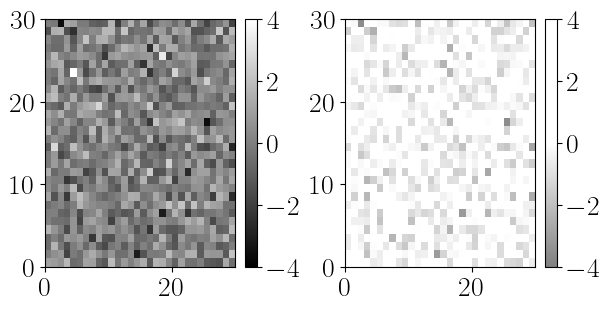

In [36]:
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.5,1.5, 128)))
plot_examples([viridis, newcmp])

CPU times: user 1min 19s, sys: 8.28 s, total: 1min 27s
Wall time: 50.6 s


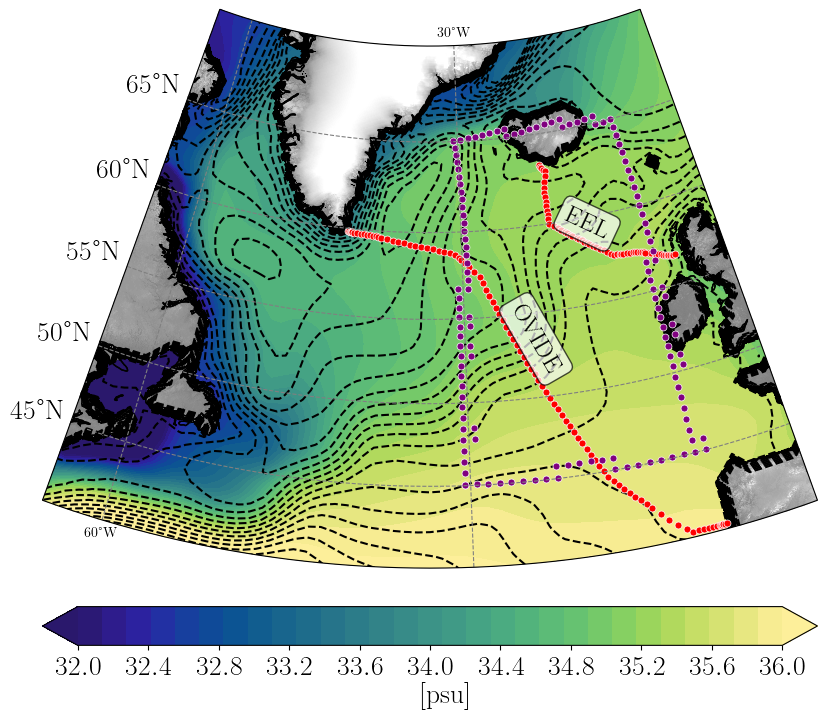

In [45]:
%%time
# plotting the iceland basin

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


fig= plt.figure(figsize=(10,10), frameon=True)

# defining the projection 
lon1, lon2, lat1, lat2 = [-65, -2, 40, 70]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)

ax = plt.axes(projection=proj)
    
                        
                        
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(32,36)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# # pcolormesh plot
#im = plt.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
#             transform=ccrs.PlateCarree())

# # Adding etopop
ax.pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp)

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)

ax.set_boundary(rect_in_target)
ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
ax.coastlines()
#ax.add_feature(land_50m) 

gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, color='gray', linestyle='dashed')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=False
gl.rotate_labels=False
gl.xlocator=ctk.LongitudeLocator(3)
gl.ylocator=ctk.LatitudeLocator(6)
gl.xformatter=ctk.LongitudeFormatter()
gl.yformatter=ctk.LatitudeFormatter()
gl.xlabel_style = {}
gl.ylabel_style = {'size': 20, 'color': 'black', 'va': 'bottom', 'ha':'right'}


co = plt.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree())
CS = plt.contour(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.mean_ETA, levels=np.linspace(-1,1.11), colors='k',  
            transform=ccrs.PlateCarree())

ax.coastlines()

#Draw the colorbar
cbar=fig.colorbar(co, orientation='horizontal', ticks=np.linspace(32,36,11), pad=0.05)
plt.figtext(0.504,0.13, '[psu]', fontsize=20)

XC_ovide = np.flip(ds_ovide.LONGITUDE[0:95].values)
YC_ovide = np.flip(ds_ovide.LATITUDE[0:95].values)
XC_ellet = ds_ellet.longitude[1:65].values
YC_ellet = ds_ellet.latitude[1:65].values

XC_iceland = od_surv_iceland.dataset['XC'].squeeze()
YC_iceland = od_surv_iceland.dataset['YC'].squeeze()

#ax.set_extent([-65, 0, 35, 85], crs=ccrs.PlateCarree())
ovide_line = ax.plot(XC_ovide, YC_ovide, 'o', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w' , transform=ccrs.PlateCarree())
ellet_line = ax.plot(XC_ellet, YC_ellet, 'o', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())
iceland_basin = ax.plot(XC_iceland, YC_iceland, 'o', markersize=5, markerfacecolor='purple',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())

props = dict(boxstyle='round', facecolor='white', alpha=0.7)

#place a text box in upper left in axes coords
ax.text(0.60, 0.35, 'OVIDE', transform=ax.transAxes, fontsize=18,
         rotation=300.0, bbox=props, weight='bold')
ax.text(0.67, 0.59, 'EEL', transform=ax.transAxes, fontsize=18,
         rotation=335.0, bbox=props, weight='bold')


ax.patch.set_facecolor('black')

plt.savefig('figs/2a.png', format='png', bbox_inches='tight', facecolor='white', dpi=300)